In [1]:
#   Exercise 5
#       1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
#       2. Create a new Jupyter notebook
#       3. Load the dataset from CSV into pandas
#       4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
#       5. The data is entirely categorical. Convert each feature to dummy variables.
#       6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.
#   Your submission should be your Jupyter notebook, keep it short and concise.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
#2. Create a new Jupyter notebook
#3. Load the dataset from CSV into pandas

df = pd.read_csv('agaricus-lepiota.data', delimiter=",")
print(df.shape)
df.describe()

(8124, 23)


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
#4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
df[['edibility', 'habitat']].groupby('habitat').describe()

edibility                 
            count unique top  freq
habitat                           
d            3148      2   e  1880
g            2148      2   e  1408
l             832      2   p   592
m             292      2   e   256
p            1144      2   p  1008
u             368      2   p   272
w             192      1   e   192

In [5]:
cross_tab = pd.crosstab(df['habitat'], df['edibility'])

# Display the cross-tabulation
print(cross_tab)

edibility     e     p
habitat              
d          1880  1268
g          1408   740
l           240   592
m           256    36
p           136  1008
u            96   272
w           192     0


(4208, 23)


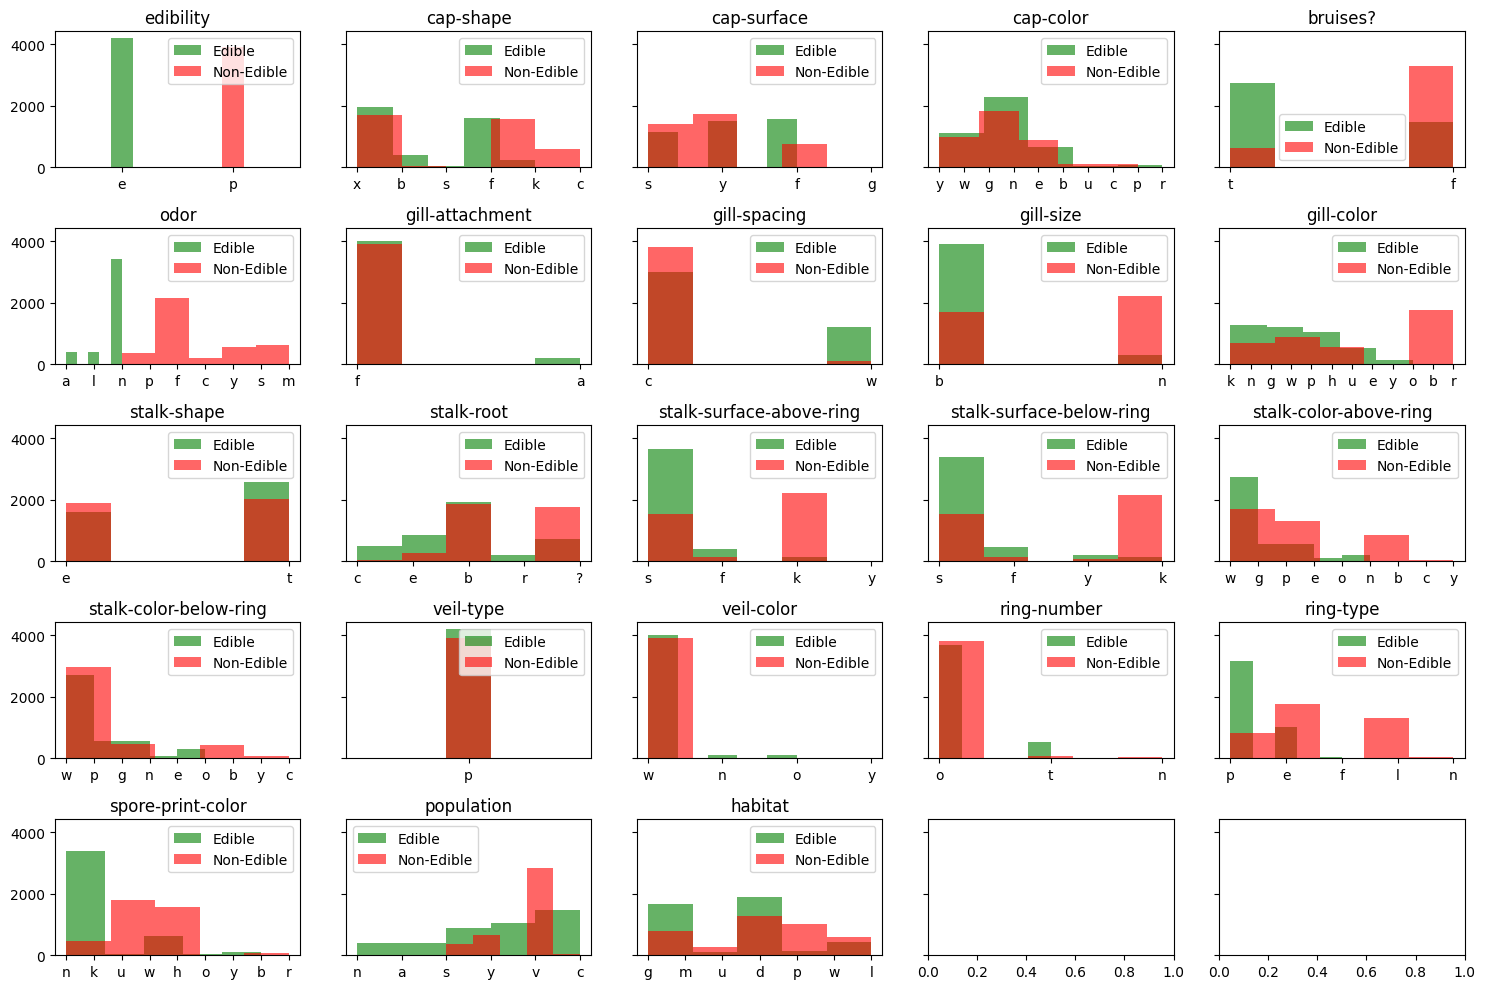

In [6]:
from pandas.plotting import scatter_matrix
edible = df[df['edibility'] == 'e']
non_edible = df[df['edibility'] == 'p']

print(edible.shape)
numb_of_columns  = math.ceil(len(df.columns)/5)
fig, axs = plt.subplots(5, numb_of_columns, sharey=True, tight_layout=True, figsize=(15, 10))

for i, h in enumerate(df.columns):
    row = i // numb_of_columns 
    col = i % numb_of_columns 
    axs[row, col].set_title(h)
    axs[row, col].hist(edible[h], bins=5, color="green", alpha=0.6, label='Edible')
    axs[row, col].hist(non_edible[h], bins=5, color="red", alpha=0.6, label='Non-Edible')
    axs[row, col].legend()



In [7]:
#5. The data is entirely categorical. Convert each feature to dummy variables.

df_dummy = pd.get_dummies(df, prefix_sep=',')
print(df_dummy.shape)

df_dummy

(8124, 119)


,"edibility,e","edibility,p","cap-shape,b","cap-shape,c","cap-shape,f","cap-shape,k","cap-shape,s","cap-shape,x","cap-surface,f","cap-surface,g",...,"population,s","population,v","population,y","habitat,d","habitat,g","habitat,l","habitat,m","habitat,p","habitat,u","habitat,w"
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


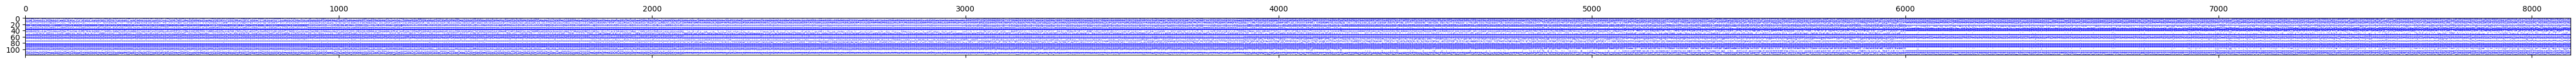

In [8]:
plt.spy(df_dummy.T, markersize=0.1, marker='s', color='blue')  # Transpose the DataFrame, adjust markersize and color
fig = plt.gcf()
fig.set_size_inches(60, 60)
plt.plot()
plt.show()



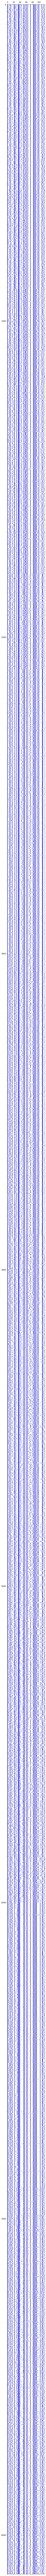

In [9]:
plt.spy(df_dummy, markersize=1.0, marker='s', color='blue')  # Transpose the DataFrame, adjust markersize and color
fig = plt.gcf()
fig.set_size_inches(400, 250)
plt.plot()
plt.show()